In [1]:
from smc import SMCsampler
from prior import CatalogPrior
from images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

In [2]:
num_images = 1
img_dim = 15 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 10
psf_stdev = 3.25
background_intensity = 19200

image_attributes = ImageAttributes(img_width = img_width,
                                   img_height = img_height,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(num_images)

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 8 
total flux
 526343.5625 
loc
 [[ 0.         0.       ]
 [13.350681   9.544291 ]
 [13.579707   2.3911123]
 [ 6.2836103 13.172787 ]
 [ 6.5998116  9.1436825]
 [12.502326   6.666784 ]
 [14.566243  10.684179 ]
 [11.799548   0.3366593]
 [ 9.70395    3.1224468]
 [ 0.         0.       ]
 [ 0.         0.       ]] 




True count: 8
True total flux: 526343.5625

Starting the sampler...
iteration 5, temperature = 0.0010033627040684223, posterior mean count = 8.436187744140625
iteration 10, temperature = 0.0034737158566713333, posterior mean count = 8.646663665771484
iteration 15, temperature = 0.007095498498529196, posterior mean count = 8.615861892700195
iteration 20, temperature = 0.011258214712142944, posterior mean count = 8.600799560546875
iteration 25, temperature = 0.01679830253124237, posterior mean count = 8.588664054870605
iteration 30, temperature = 0.02423802576959133, posterior mean count = 8.570111274719238
iteration 35, temperature = 0.03343759849667549, posterior mean count = 8.553312301635742
iteration 40, temperature = 0.04799289256334305, posterior mean count = 8.514801979064941
iteration 45, temperature = 0.06868131458759308, posterior mean count = 8.500336647033691
iteration 50, temperature = 0.10166700184345245, posterior mean count = 8.488844871520996
iteration 55, temperature =

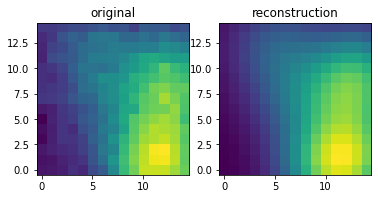

In [4]:
max_objects_smc = max_objects + 2
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3.)
smc = SMCsampler(images[0], image_attributes, prior, num_blocks = max_objects_smc+1, catalogs_per_block = 500, max_smc_iters = 1000)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
smc.summarize()